# IM939 Lab 2 - Part 3

Our data can contain missing values or benifit from transformations.

## Missing values

I have removed some of the ratings data in the office_ratings_missing.csv.

In [1]:
import pandas as pd
df = pd.read_csv('office_ratings_missing.csv', encoding = 'UTF-8')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       188 non-null    int64  
 1   episode      188 non-null    int64  
 2   title        188 non-null    object 
 3   imdb_rating  170 non-null    float64
 4   total_votes  168 non-null    float64
 5   air_date     188 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 8.9+ KB


We are missing values in our imdb_rating and total votes columns.

In [3]:
df.shape[0] - df.count()

season          0
episode         0
title           0
imdb_rating    18
total_votes    20
air_date        0
dtype: int64

What to do? A quick solution is to either 0 the values or give them a roughtly central value (the mean).

To do this we use the fillna method.

In [4]:
df['imdb_rating_with_0'] = df['imdb_rating'].fillna(0)

To fill with the mean.

In [5]:
df['imdb_rating_with_mean'] = df['imdb_rating'].fillna(df['imdb_rating'].mean())

In [6]:
df.head()

,season,episode,title,imdb_rating,total_votes,air_date,imdb_rating_with_0,imdb_rating_with_mean
0,1,1,Pilot,7.6,NaN,24/03/2005,7.6,7.6
1,1,2,Diversity Day,8.3,3566.0,29/03/2005,8.3,8.3
2,1,3,Health Care,7.9,2983.0,05/04/2005,7.9,7.9
3,1,4,The Alliance,8.1,2886.0,12/04/2005,8.1,8.1
4,1,5,Basketball,8.4,3179.0,19/04/2005,8.4,8.4


We can plot these to see what looks most reasonable (you can probably also make an educated guess here).

<AxesSubplot:>

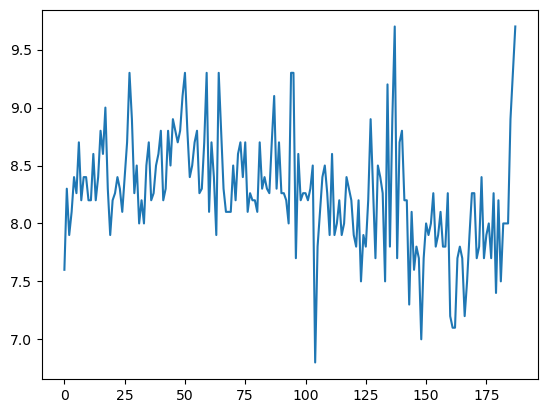

In [7]:
df['imdb_rating_with_mean'].plot()

<AxesSubplot:>

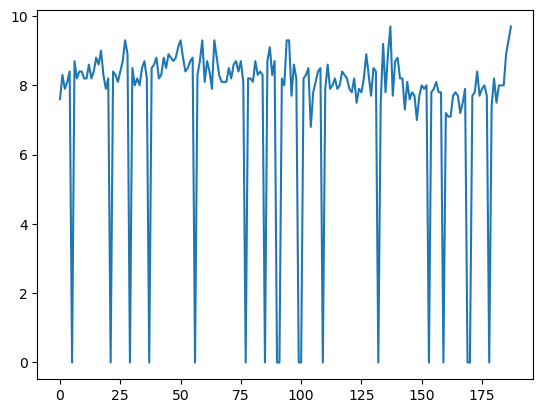

In [8]:
df['imdb_rating_with_0'].plot()

Going with the mean seems quite sensible in this case. Especially as the data is guassian so the mean is probably an accurate represenation of the central value.

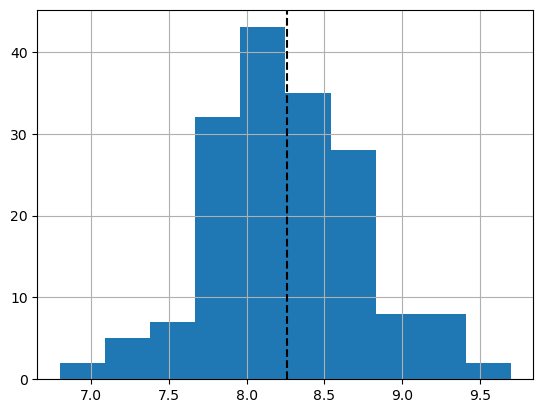

In [9]:
ax = df['imdb_rating'].hist()
ax.axvline(df['imdb_rating'].mean(), color='k', linestyle='--')

## Transformations

Some statistical models, such as standard linear regression, require the predicted variable to be gaussian distributed (a single central point and a roughly symmetrical decrease in frequency, see [this Wolfram alpha page](https://www.wolframalpha.com/input/?i=gaussian+0+1).

The distribution of votes is positively skewed (most values are low).

<AxesSubplot:>

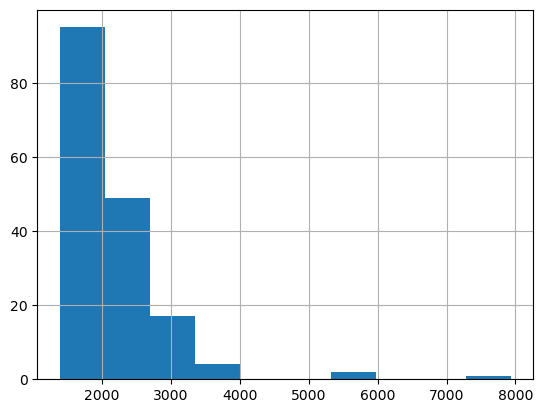

In [10]:
df['total_votes'].hist()

A log transformation can make this data closer to a guassian distributed data variable. For the log transformation we are going to use numpy (numerical python) which is a rather excellent library.

In [11]:
import numpy as np

df['total_votes_log'] = np.log2(df['total_votes'])

<AxesSubplot:>

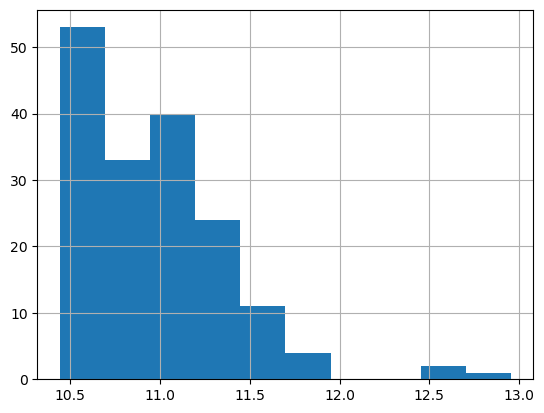

In [12]:
df['total_votes_log'].hist()

That is less skewed, but not ideal. Perhaps a square root transformation instead?

<AxesSubplot:>

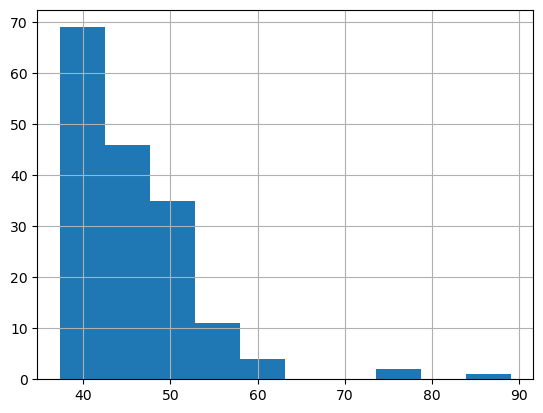

In [13]:
df['total_votes_sqrt'] = np.sqrt(df['total_votes'])
df['total_votes_sqrt'].hist()

...well, maybe a inverse/reciprocal transformation. It is possible we have hit the limit on what we can do.

<AxesSubplot:>

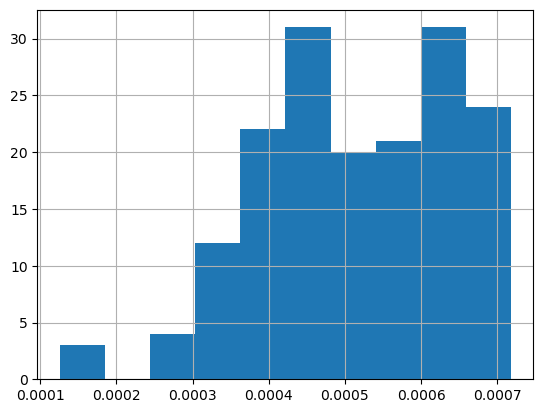

In [14]:
df['total_votes_recip'] = np.reciprocal(df['total_votes'])
df['total_votes_recip'].hist()

At this point, I think we should conceded that we can make the distribution less positively skewed. However, transformation are not magic and we cannot turn a heavily positively skewed distribution into a normally distributed one.

Oh well.

We can calculate z scores though so we can plot both total_votes and imdb_ratings on a single plot. Currently, the IMDB scores vary between 0 and 10 whereas the number of votes number in the thousands.

In [15]:
df['total_votes_z'] = (df['total_votes'] - df['total_votes'].mean()) / df['total_votes'].std()
df['imdb_rating_z'] = (df['imdb_rating'] - df['imdb_rating'].mean()) / df['imdb_rating'].std()

<AxesSubplot:>

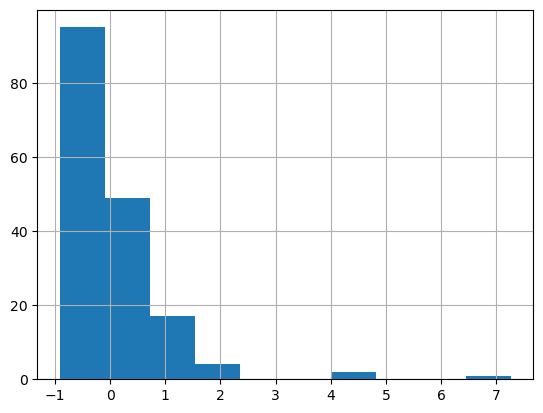

In [16]:
df['total_votes_z'].hist()

<AxesSubplot:>

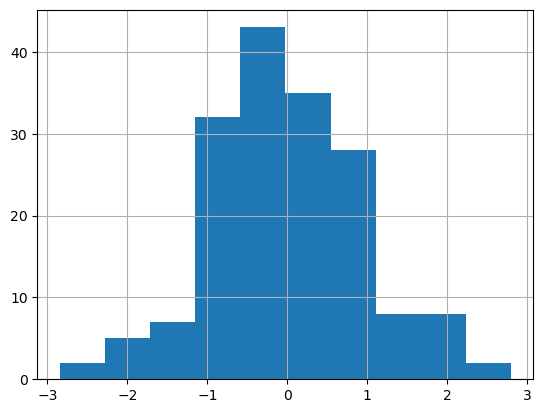

In [17]:
df['imdb_rating_z'].hist()

Now we can compare the trends in score and number of votes on a single plot.

We are going to use a slightly different approach to creating the plots. Called to the plot() method from Pandas actually use a library called matplotlib. We are going to use the pyplot module of matplotlib directly.

In [18]:
import matplotlib.pyplot as plt

Convert the air date into a datetime object.

In [19]:
df['air_date'] =  pd.to_datetime(df['air_date'])

/var/folders/7v/zl9mv52s3ls94kntlt_l9ryh0000gq/T/ipykernel_17696/2716201442.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['air_date'] =  pd.to_datetime(df['air_date'])


Then call the subplots function fom pyplot to create two plots. From this we take the two plot axis (ax1, ax2) and call the method scatter for each to plot imdb_rating_z and total_votes_z.

Text(0.5, 1.0, 'Total votes')

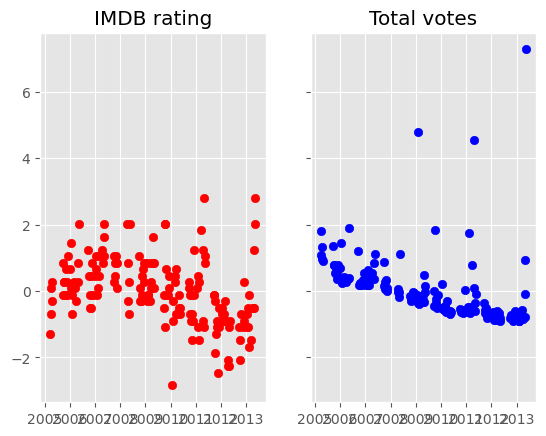

In [20]:
plt.style.use('ggplot')

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter( df['air_date'], df['imdb_rating_z'], color = 'red')
ax1.set_title('IMDB rating')
ax2.scatter( df['air_date'], df['total_votes_z'], color = 'blue')
ax2.set_title('Total votes')

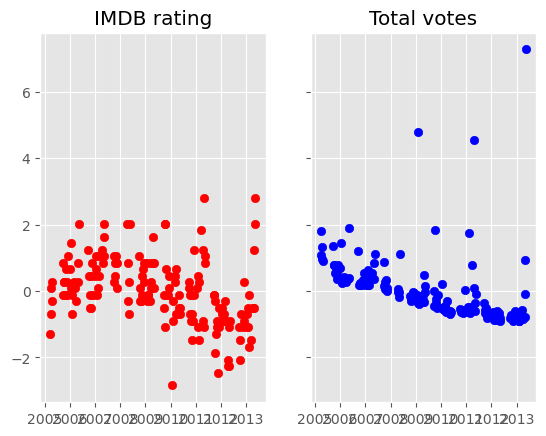

In [21]:
f

We can do better than that.

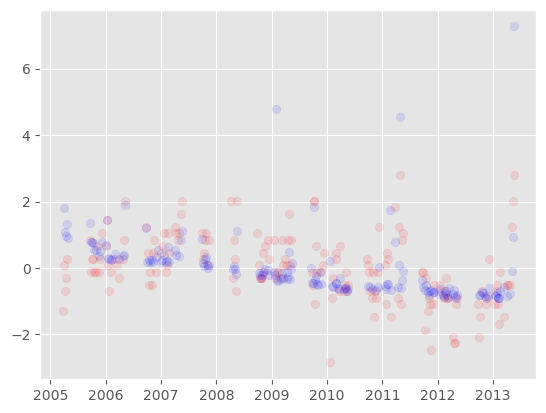

In [22]:
plt.scatter(df['air_date'], df['imdb_rating_z'], color = 'red', alpha = 0.1)
plt.scatter(df['air_date'], df['total_votes_z'], color = 'blue', alpha = 0.1)

In [23]:
?plt.scatter

Signature:
plt.scatter(
    x,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None,
    *,
    edgecolors=None,
    plotnonfinite=False,
    data=None,
    **kwargs,
)
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2.
    Default is ``rcParams['lines.markersize'] ** 2``.

c : array-like or list of colors or color, optional
    The marker colors. Possible values:

    - A scalar or sequence of n numbers to be mapped to colors using
      *cmap* and *norm*.
    - A 2D array in which the rows are RGB or RGBA.
    - A sequence of colors of length n.
    - A single color format string.

    Note that *c* should not be a single numeric RGB or RGBA sequence
    because that is indistinguishable from an arra

We have done a lot so far. Exploring data in part 1, plotting data with the inbuilt Pandas methods in part 2 and dealing with both missing data and transfromations in part 3.

In part 4, we will look at creating your own functions, a plotting library called seaborn and introduce a larger dataset.